In [1]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

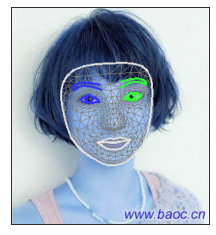

In [2]:

# For static images:
# IMAGE_FILES = ["images/rectangle.jpg"]
IMAGE_FILES = ["published_dataset/round/img_no_303.jpg"]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      # print("face_landmarks:", face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite("/images/annotated_image" + str(idx) + ".png", annotated_image)
    img = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)
    # plt.imshow(img)
    plt.imshow(annotated_image)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

In [3]:
MESH_ANNOTATIONS = {
  "silhouetteForehead": [
    10, 338, 297, 332, 284, 251, 21,  54,  103, 67, 109
  ],

  "silhouetteCheekbones": [
    389, 356, 454, 323, 93, 234, 127, 162
  ],

  "silhouetteJaw": [
    361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132
  ],

  "lipsUpperOuter": [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291],
  "lipsLowerOuter": [146, 91, 181, 84, 17, 314, 405, 321, 375, 291],
  "lipsUpperInner": [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308],
  "lipsLowerInner": [78, 95, 88, 178, 87, 14, 317, 402, 318, 324, 308],

  "rightEyeUpper0": [246, 161, 160, 159, 158, 157, 173],
  "rightEyeLower0": [33, 7, 163, 144, 145, 153, 154, 155, 133],
  "rightEyeUpper1": [247, 30, 29, 27, 28, 56, 190],
  "rightEyeLower1": [130, 25, 110, 24, 23, 22, 26, 112, 243],
  "rightEyeUpper2": [113, 225, 224, 223, 222, 221, 189],
  "rightEyeLower2": [226, 31, 228, 229, 230, 231, 232, 233, 244],
  "rightEyeLower3": [143, 111, 117, 118, 119, 120, 121, 128, 245],

  "rightEyebrowUpper": [156, 70, 63, 105, 66, 107, 55, 193],
  "rightEyebrowLower": [35, 124, 46, 53, 52, 65],

  "rightEyeIris": [473, 474, 475, 476, 477],

  "leftEyeUpper0": [466, 388, 387, 386, 385, 384, 398],
  "leftEyeLower0": [263, 249, 390, 373, 374, 380, 381, 382, 362],
  "leftEyeUpper1": [467, 260, 259, 257, 258, 286, 414],
  "leftEyeLower1": [359, 255, 339, 254, 253, 252, 256, 341, 463],
  "leftEyeUpper2": [342, 445, 444, 443, 442, 441, 413],
  "leftEyeLower2": [446, 261, 448, 449, 450, 451, 452, 453, 464],
  "leftEyeLower3": [372, 340, 346, 347, 348, 349, 350, 357, 465],

  "leftEyebrowUpper": [383, 300, 293, 334, 296, 336, 285, 417],
  "leftEyebrowLower": [265, 353, 276, 283, 282, 295],

  "leftEyeIris": [468, 469, 470, 471, 472],

  "midwayBetweenEyes": [168],

  "noseTip": [1],
  "noseBottom": [2],
  "noseRightCorner": [98],
  "noseLeftCorner": [327],

  "rightCheek": [205],
  "leftCheek": [425]
};

In [4]:
keypoints = []
for face in results.multi_face_landmarks:
    for landmark in face.landmark:
        x = landmark.x
        y = landmark.y
        z = landmark.z
        keypoints.append({
                         'X': x,
                         'Y': y,
                         'Z': z
                         })

In [5]:
lowestX = 1
widestLandmark = 0
landmarkIndex = 0
facePart = ""
for index, landmark in enumerate(keypoints):
    if landmark.get("X") < lowestX:
        lowestX = landmark.get("X")
        widestLandmark = landmark
        landmarkIndex = index
print(lowestX, landmark, landmarkIndex)
for part in MESH_ANNOTATIONS.keys():
    if landmarkIndex in MESH_ANNOTATIONS.get(part):
        facePart = part
        break
print(facePart)

0.25233083963394165 {'X': 0.6090936660766602, 'Y': 0.43304792046546936, 'Z': 0.0009058341383934021} 127
silhouetteCheekbones


In [6]:
point1 = np.array((keypoints[21].get("X"), keypoints[21].get("Y"), keypoints[21].get("Z")))
point2 = np.array((keypoints[251].get("X"), keypoints[251].get("Y"), keypoints[251].get("Z")))
line1Length = np.linalg.norm(point1 - point2)

point11 = np.array((keypoints[234].get("X"), keypoints[234].get("Y"), keypoints[234].get("Z")))
point21 = np.array((keypoints[454].get("X"), keypoints[454].get("Y"), keypoints[454].get("Z")))
line2Length = np.linalg.norm(point11 - point21)

point12 = np.array((keypoints[132].get("X"), keypoints[132].get("Y"), keypoints[132].get("Z")))
point22 = np.array((keypoints[361].get("X"), keypoints[361].get("Y"), keypoints[361].get("Z")))
line3Length = np.linalg.norm(point12 - point22)

point13 = np.array((keypoints[10].get("X"), keypoints[10].get("Y"), keypoints[10].get("Z")))
point23 = np.array((keypoints[152].get("X"), keypoints[152].get("Y"), keypoints[152].get("Z")))
line4Length = np.linalg.norm(point13 - point23)

print(line1Length)
print(line2Length)
print(line3Length)
print(line4Length)

similarity = np.std([line1Length,line2Length,line3Length])
print("similarity =", similarity)
widestPart = max(line1Length, line2Length, line3Length)
ovalsimilarity = np.std([widestPart,line4Length])
print('diam =', ovalsimilarity)

#we use arctangents for angle calculation
ax,ay = keypoints[132].get("X"), keypoints[132].get("Y")
bx,by = keypoints[172].get("X"), keypoints[172].get("Y")
cx,cy = keypoints[140].get("X"), keypoints[140].get("Y")
dx,dy = keypoints[148].get("X"), keypoints[148].get("Y")

import math
from math import degrees

alpha0 = math.atan2(cy - ay,cx - ax)
alpha1 = math.atan2(dy - by,dx - bx)
alpha = alpha1 - alpha0
angle = abs(degrees(alpha))
angle = 180 - angle

print("angle = ", angle)

if similarity < 0.015:
    if angle < 160:
        print("square")
    elif ovalsimilarity < 0.05:
        print("round")
    else:
        print("oval")
elif line1Length > line2Length and line1Length > line3Length:
    print("heart")
elif line2Length > line1Length and line2Length > line3Length:
    print("diamond")
elif line3Length > line1Length and line3Length > line2Length:
    print("triangle")

0.44127489385838925
0.4521481906763567
0.418411202131841
0.4918911629857211
similarity = 0.014060035479293916
diam = 0.019871486154682205
angle =  167.01364107782507
round


In [7]:
point1 = np.array((keypoints[475].get("X"), keypoints[475].get("Y"), keypoints[475].get("Z")))
point2 = np.array((keypoints[470].get("X"), keypoints[470].get("Y"), keypoints[470].get("Z")))
distanceBetweenEyes = np.linalg.norm(point1 - point2)

if distanceBetweenEyes > line2Length / 2:
    print("you have wide set eyes")
else :
    print("you have close set eyes")

you have close set eyes
